## Arbitrary value imputation with Scikit-learn ==> SimpleImputer

The **SimpleImputer** class of Scikit-learn imputes missing values, by **mean** and **median** (numeric variables), by **frequent category** (categorical variables) and **arbitrary value** (categorical and numerical variables). **Simple to use** if applied to the entire dataframe, it has **good quality code**, and **Fast computation** (by numpy), allows for **grid search** over the various imputation techniques and allows for **different missing values encodings** (you can indicate if the missing values are np.nan, or zeroes, etc). It returns a numpy array instead of a pandas dataframe, inconvenient for data analysis, requires more lines of code!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

**Use only the following variables for the demo: 3 of which contain NA!**

In [2]:
cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

**Load the House Prices dataset**

In [3]:
data = pd.read_csv('housingPrices_train.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


**Check the null values!**

In [4]:
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [5]:
cols_to_use.remove('SalePrice')
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

**Check the misssing data again!**

In [6]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

**Impute the missing values with SimpleImputer! Create an instance! Arbitrary value: 999 !**

In [7]:
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)
imputer.fit(X_train)  # Fit the imputer to the train set

SimpleImputer(fill_value=999, strategy='constant')

For **arbitrary value imputation**, we need to set the **strategy to 'constant'** and indicate the arbitrary value in the **fill_value** argument. 

**Look at the learnt imputation values like this:**

In [9]:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

**Impute the train and test set. NOTE: the data is returned as a numpy array!!!**

In [10]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

**Transform it back to a dataframe:**

In [11]:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


**Explore the distributions after the imputation!**

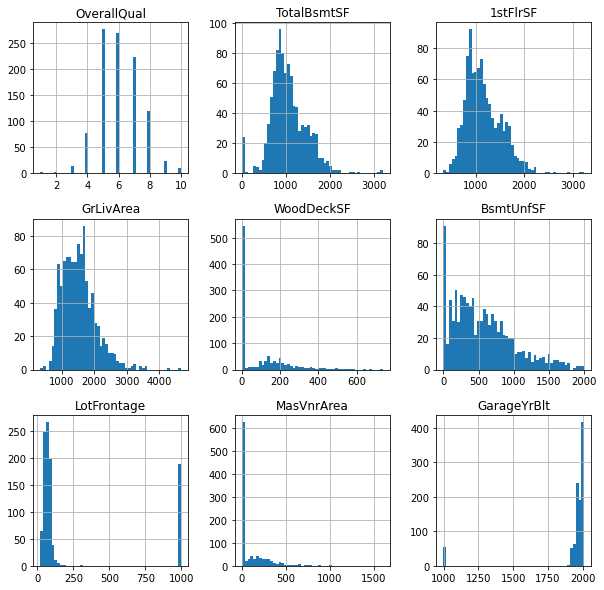

In [12]:
X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the tall bar at **999** in the **LotFrontage's histogram**, which appeared after the imputation. You can also see the imputation effect on **GarageYrBlt**, with the bar at the far left right at the 999 value. **The order in which you pass the column names are important!**

### SimpleImputer: different procedures on different features

**SimpleImputer** is in the **ColumnTransformer class (beta version)** from Scikit-learn! by it we implement different imputation techniques to different features!

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

**Check the missing values!**

In [17]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

**Look at the distributions of the variables to decide which arbitrary value to use for each feature!**

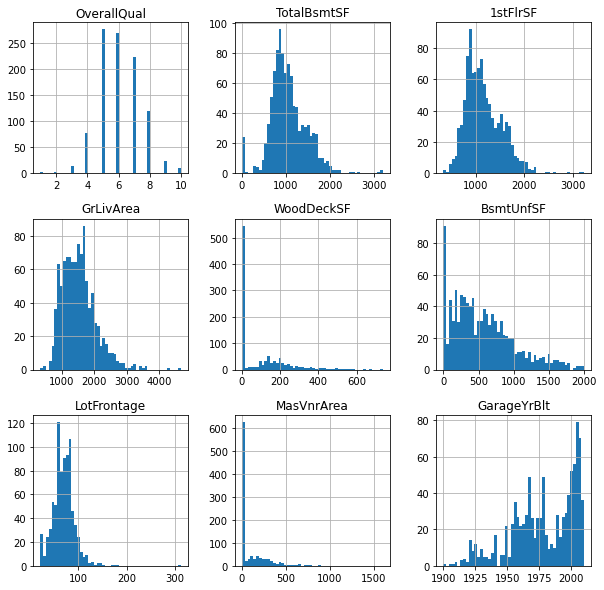

In [18]:
X_train.hist(bins=50, figsize=(10,10))
plt.show()

For this demo, I will impute each of **LotFrontage, MasVnrArea and GarageYrBlt** with **different arbitrary values**.

**Make lists, indicating which features will be imputed with each value!**

In [20]:
features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']
preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', SimpleImputer(
        strategy='constant', fill_value=999), features_LotFrontAge),
    ('imputer_MasVnrArea', SimpleImputer(
        strategy='constant', fill_value=-10), features_MasVnrArea),
    ('imputer_GarageYrBlt', SimpleImputer(
        strategy='constant', fill_value=1700), features_GarageYrBlt)
], remainder='drop')

**Fit the preprocessor!**

In [21]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('imputer_LotFrontAge',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 SimpleImputer(fill_value=-10,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('imputer_GarageYrBlt',
                                 SimpleImputer(fill_value=1700,
                                               strategy='constant'),
                                 ['GarageYrBlt'])])

**Explore the transformers like this:**

In [22]:
preprocessor.transformers

[('imputer_LotFrontAge',
  SimpleImputer(fill_value=999, strategy='constant'),
  ['LotFrontage']),
 ('imputer_MasVnrArea',
  SimpleImputer(fill_value=-10, strategy='constant'),
  ['MasVnrArea']),
 ('imputer_GarageYrBlt',
  SimpleImputer(fill_value=1700, strategy='constant'),
  ['GarageYrBlt'])]

**Look at the parameters learnt like this: for LotFrontAge!**

In [23]:
preprocessor.named_transformers_['imputer_LotFrontAge'].statistics_

array([999.])

**For MasVnrArea**

In [24]:
preprocessor.named_transformers_['imputer_MasVnrArea'].statistics_

array([-10.])

**For GarageYrBlt**

In [25]:
preprocessor.named_transformers_['imputer_GarageYrBlt'].statistics_

array([1700.])

**Impute the data!**

In [26]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying remainder='drop' in the columnTransformer.

**ANOTHER NOTE OF CAUTION**

**ColumnTransformer** is in essence just slicing the dataframe in the required features. Then the **SimpleImputer operates on the sliced dataframe.** If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and **then concatenate them** to produce the final output.

**See how the result of the imputation is a 3 column dataset!**

In [27]:
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


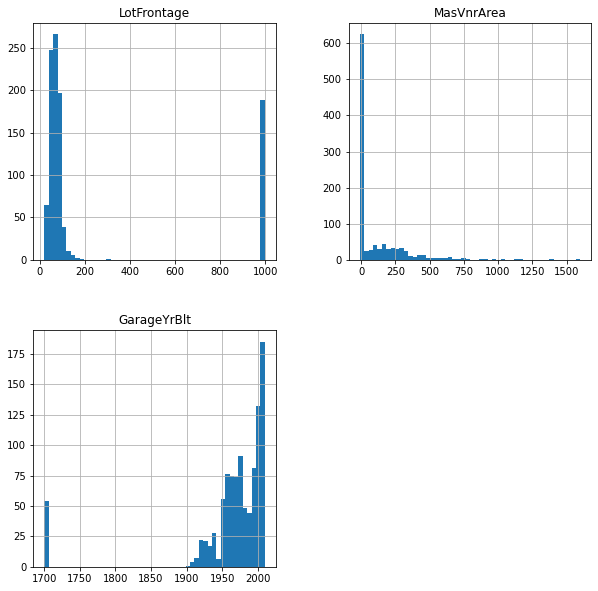

In [28]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the bars corresponding to the arbitrary values at **1700, 999 and -1** for each feature!